In [4]:
from ucimlrepo import fetch_ucirepo 
  
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# data (as pandas dataframes) 
X = individual_household_electric_power_consumption.data.features 
y = individual_household_electric_power_consumption.data.targets 
  
# metadata 
print(individual_household_electric_power_consumption.metadata) 
  
# variable information 
print(individual_household_electric_power_consumption.variables) 

/Users/robbieardison/anaconda3/envs/tf-pro/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [6]:
import pandas as pd
import numpy as np

data_url = 'https://archive.ics.uci.edu/static/public/235/data.csv'
df = pd.read_csv(data_url, low_memory=False) # , sep=';'

df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
# Convert 'Date' and 'Time' to a single datetime column
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the 'Date' and 'Time' columns as they are now combined into 'datetime'
df.drop(columns=['Date', 'Time'], inplace=True)

# Convert the power consumption columns to numeric (they might have commas or non-numeric values)
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                      'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Handle missing values - for simplicity, let's fill missing values with the median of each column
df.fillna(df.median(), inplace=True)

# Extract time-related features from the 'datetime' column
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday

# Drop the 'datetime' column as it's no longer needed
df.drop(columns=['datetime'], inplace=True)

# Check the first few rows after preprocessing
print(df.head())

   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  hour  day  month  weekday  
0             0.0             1.0            17.0    17   16     12        5  
1             0.0             1.0            16.0    17   16     12        5  
2             0.0             2.0            17.0    17   16     12        5  
3             0.0             1.0            17.0    17   16     12        5  
4             0.0             1.0            17.0    17   16     12        5  


In [8]:
# Define features and target
X = df.drop(columns=['Global_active_power'])
y = df['Global_active_power']

# Split the data into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the features (important for some models like SVM or KNN)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 0.023603615600568027
Root Mean Squared Error: 0.03901569092945982


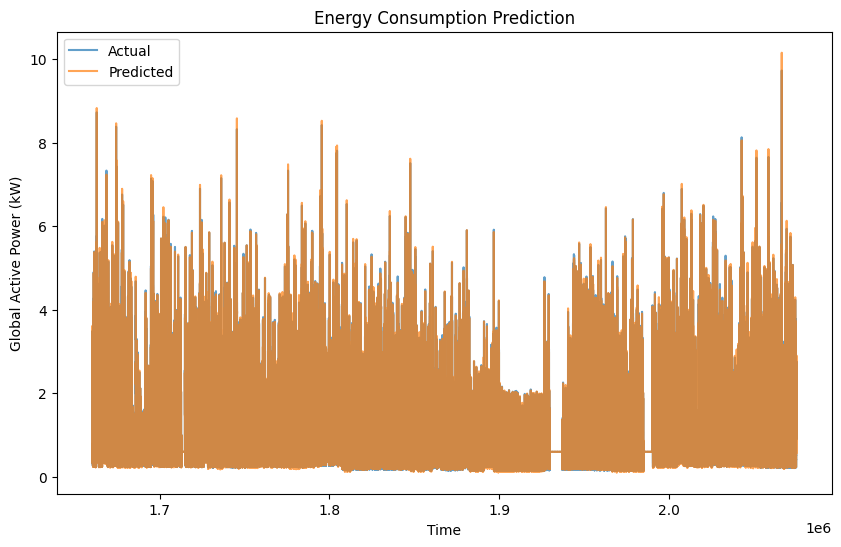

In [10]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Energy Consumption Prediction')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.show()


## Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (MAE) with Random Forest: {mae_rf}")

# Calculate Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Root Mean Squared Error (RMSE) with Random Forest: {rmse_rf}")

Mean Absolute Error (MAE) with Random Forest: 0.020201402850038765
Root Mean Squared Error (RMSE) with Random Forest: 0.03234132327807789


In [12]:
feature_importances = rf_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

Global_reactive_power: 0.00041802815442397055
Voltage: 0.00043983951179596143
Global_intensity: 0.9983024440042793
Sub_metering_1: 0.00016213012271056848
Sub_metering_2: 7.80087621514789e-05
Sub_metering_3: 0.00013295915765209766
hour: 0.00014190066949748144
day: 0.00013615132660270998
month: 0.00011250015896611364
weekday: 7.603813192030218e-05


### Hyperparameter Tuning

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [16]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]         # Whether bootstrap samples are used when building trees
}


In [17]:
rf_model = RandomForestRegressor(random_state=42)

In [18]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.2min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.2min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.2min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.3min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.3min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=10.7min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=10.7min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=10.8min


KeyboardInterrupt: 

In [ ]:
# Best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best Score
print("Best Score (MAE):", grid_search.best_score_)


In [ ]:
# Best Model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predictions
y_pred_best = best_rf_model.predict(X_test)

# Evaluation Metrics
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("Mean Absolute Error (MAE) with Tuned Model:", mae_best)
print("Root Mean Squared Error (RMSE) with Tuned Model:", rmse_best)


## XGBoost for Regression

In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'data' is the dataframe you have preprocessed, with features in 'X' and target in 'y'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 0.017046630648091515
Root Mean Squared Error: 0.02863159412600939
